# FIT5196 Task 4 in Assessment 2
#### Student Name: Siyang Feng
#### Student ID: 28246993

Date: 13/05/2018

Version: 2.0

Environment: Python 3.6.2 and Anaconda 4.3.29

Libraries used:
* pandas 0.20.3 (for data frame, included in Anaconda Python 3.6)
* numpy 1.13.1 (for data format, included in Anaconda Python 3.6)
* sklearn (for create model, included in Anaconda Python 3.6)
* seaborn 0.8.0 (for plot date, included in Anaconda Python 3.6)


## Introduction
In this task, you are required to identify the outliers and delete those rows with outliers by analyzing the dataset4 (dataset4_with_outliers.csv).
## Import Library

In [1]:
import sys
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

try:
    import seaborn as sb
    sb.set_style("whitegrid")
except:
    !{sys.executable} -m pip install seaborn
    import seaborn as sb 
    sb.set_style("whitegrid")
from pylab import rcParams
rcParams['figure.figsize'] = 5, 4
    
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
#Notebook displace setting
from IPython.core.display import HTML

In [2]:
print(sys.version_info)
print('Pandas version :', pd.__version__)
print('numpy version :', np.__version__)
print('seaborn varsion :', sb.__version__)

sys.version_info(major=3, minor=6, micro=2, releaselevel='final', serial=0)
Pandas version : 0.20.3
numpy version : 1.13.1
seaborn varsion : 0.8.0


## Import CSV Data and Check global Info

In [3]:
ds = pd.read_csv('dataset4_with_outliers.csv')
ds.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,5437400630,20141016T000000,625000.0,4,2.25,1920,8259,2.0,0,0,4,8,1920,0,1979,0,98027,47.5616,-122.088
1,3999300290,20141016T000000,850000.0,3,3.50,2620,11148,2.0,0,4,4,9,2060,560,1977,0,98008,47.5845,-122.115
2,2525059134,20141016T000000,500000.0,2,1.50,1760,12000,1.0,0,0,4,7,1760,0,1964,0,98052,47.6288,-122.109
3,1862400285,20141016T000000,375000.0,3,1.00,1200,5404,1.0,0,0,3,6,1200,0,1937,0,98117,47.6969,-122.368
4,7199320190,20141016T000000,618000.0,4,2.25,2470,7350,1.0,0,0,3,7,1600,870,1978,0,98052,47.6936,-122.128


In [4]:
ds.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,9.996000e+03,9.996000e+03,9996.000000,9996.000000,9996.000000,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,4.598579e+09,4.980468e+05,3.356943,2.082558,2025.039916,1.547281e+04,1.487345,0.002401,0.194678,3.374250,7.593037,1750.824930,274.214986,1972.056423,68.046919,98078.460984,47.555261,-122.212583
std,2.880071e+09,2.540477e+05,0.937060,0.736420,854.963922,4.297506e+04,0.540751,0.048943,0.679519,0.623769,1.112505,793.994317,418.925228,28.847071,362.111900,53.448592,0.142261,0.140801
min,1.000102e+06,8.995000e+04,1.000000,0.500000,390.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,390.000000,0.000000,1900.000000,0.000000,98001.000000,47.162200,-122.519000
25%,2.126049e+09,3.200000e+05,3.000000,1.500000,1400.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1953.000000,0.000000,98033.000000,47.456775,-122.329000
50%,3.905060e+09,4.400000e+05,3.000000,2.250000,1870.000000,7.509500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1976.000000,0.000000,98065.000000,47.563500,-122.228000
75%,7.371500e+09,6.100000e+05,4.000000,2.500000,2480.000000,1.036150e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2160.000000,520.000000,1998.000000,0.000000,98118.000000,47.679900,-122.122000
max,9.900000e+09,2.700000e+06,20.000000,6.500000,7880.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,2610.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9996 entries, 0 to 9995
Data columns (total 19 columns):
id               9996 non-null int64
date             9996 non-null object
price            9996 non-null float64
bedrooms         9996 non-null int64
bathrooms        9996 non-null float64
sqft_living      9996 non-null int64
sqft_lot         9996 non-null int64
floors           9996 non-null float64
waterfront       9996 non-null int64
view             9996 non-null int64
condition        9996 non-null int64
grade            9996 non-null int64
sqft_above       9996 non-null int64
sqft_basement    9996 non-null int64
yr_built         9996 non-null int64
yr_renovated     9996 non-null int64
zipcode          9996 non-null int64
lat              9996 non-null float64
long             9996 non-null float64
dtypes: float64(5), int64(13), object(1)
memory usage: 1.4+ MB


## Select analyzing data
attributes 'id' and 'date' will not influence the outlier data.

aggregation of attrbutes 'lat' and 'long' has a similiar value with attribute 'zipcode'. We can only need 'zipcode'.

Thus, we drop them from analyzing.

In [6]:
ds1 = ds.drop(['id', 'date', 'lat', 'long'], axis=1)
ds1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,625000.0,4,2.25,1920,8259,2.0,0,0,4,8,1920,0,1979,0,98027
1,850000.0,3,3.50,2620,11148,2.0,0,4,4,9,2060,560,1977,0,98008
2,500000.0,2,1.50,1760,12000,1.0,0,0,4,7,1760,0,1964,0,98052
3,375000.0,3,1.00,1200,5404,1.0,0,0,3,6,1200,0,1937,0,98117
4,618000.0,4,2.25,2470,7350,1.0,0,0,3,7,1600,870,1978,0,98052


In [7]:
ds1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
count,9.996000e+03,9996.000000,9996.000000,9996.000000,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,4.980468e+05,3.356943,2.082558,2025.039916,1.547281e+04,1.487345,0.002401,0.194678,3.374250,7.593037,1750.824930,274.214986,1972.056423,68.046919,98078.460984
std,2.540477e+05,0.937060,0.736420,854.963922,4.297506e+04,0.540751,0.048943,0.679519,0.623769,1.112505,793.994317,418.925228,28.847071,362.111900,53.448592
min,8.995000e+04,1.000000,0.500000,390.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,390.000000,0.000000,1900.000000,0.000000,98001.000000
25%,3.200000e+05,3.000000,1.500000,1400.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1953.000000,0.000000,98033.000000
50%,4.400000e+05,3.000000,2.250000,1870.000000,7.509500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1976.000000,0.000000,98065.000000
75%,6.100000e+05,4.000000,2.500000,2480.000000,1.036150e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2160.000000,520.000000,1998.000000,0.000000,98118.000000
max,2.700000e+06,20.000000,6.500000,7880.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7880.000000,2610.000000,2015.000000,2015.000000,98199.000000


## Normalization
use packadge `'MinMaxScaler'` to do normalization which will be efficient for further processing.

In [8]:
min_max = MinMaxScaler()
normal_list = min_max.fit_transform(ds1)
normal_list[:3]

array([[ 0.20499607,  0.15789474,  0.29166667,  0.20427236,  0.00664706,
         0.4       ,  0.        ,  0.        ,  0.75      ,  0.44444444,
         0.20427236,  0.        ,  0.68695652,  0.        ,  0.13131313],
       [ 0.29120132,  0.10526316,  0.5       ,  0.29773031,  0.00912844,
         0.4       ,  0.        ,  1.        ,  0.75      ,  0.55555556,
         0.22296395,  0.21455939,  0.66956522,  0.        ,  0.03535354],
       [ 0.15710427,  0.05263158,  0.16666667,  0.18291055,  0.00986022,
         0.        ,  0.        ,  0.        ,  0.75      ,  0.33333333,
         0.18291055,  0.        ,  0.55652174,  0.        ,  0.25757576]])

In [9]:
normal_ds = pd.DataFrame(normal_list, columns=ds1.columns)
normal_ds.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,0.204996,0.157895,0.291667,0.204272,0.006647,0.4,0.0,0.0,0.75,0.444444,0.204272,0.000000,0.686957,0.0,0.131313
1,0.291201,0.105263,0.500000,0.297730,0.009128,0.4,0.0,1.0,0.75,0.555556,0.222964,0.214559,0.669565,0.0,0.035354
2,0.157104,0.052632,0.166667,0.182911,0.009860,0.0,0.0,0.0,0.75,0.333333,0.182911,0.000000,0.556522,0.0,0.257576
3,0.109212,0.105263,0.083333,0.108144,0.004195,0.0,0.0,0.0,0.50,0.222222,0.108144,0.000000,0.321739,0.0,0.585859
4,0.202314,0.157895,0.291667,0.277704,0.005866,0.0,0.0,0.0,0.50,0.333333,0.161549,0.333333,0.678261,0.0,0.257576


## Outlier analyzing
### SOS unsupervised outlier prediction
Stochastic Outlier Selection(SOS) is a unsupervised algorithm to select outlier items from dataset. SOS is an affinity-based approach to select outlier and it will return a probability of one point to be outlier.[1]

In [10]:
try:
    from sksos import SOS
except:
    !{sys.executable} -m pip install scikit-sos
    !{sys.executable} -m pip install --upgrade pip
    from sksos import SOS

In [11]:
detector = SOS()
normal_ds['probability'] = detector.predict(normal_ds.values)

In [12]:
outlier_ds = normal_ds.sort_values('probability', ascending=False)
outlier_ds.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,probability
9566,0.038333,0.052632,0.083333,0.042724,1.000000,0.0,0.0,0.00,0.25,0.111111,0.042724,0.000000,0.130435,0.0,0.065657,0.999983
8869,0.757186,0.105263,0.333333,0.252737,0.002986,0.4,0.0,0.00,0.50,0.444444,0.252737,0.000000,0.939130,0.0,0.151515,0.998113
3725,0.324726,0.157895,0.583333,0.688251,0.747831,0.4,0.0,0.00,0.50,0.777778,0.429239,0.743295,0.895652,0.0,0.065657,0.997169
2907,0.085267,0.157895,0.000000,0.255007,0.004337,0.4,0.0,0.00,0.50,0.444444,0.255007,0.000000,0.834783,0.0,0.459596,0.993997
8177,0.048677,0.052632,0.083333,0.045394,0.001615,0.0,0.0,0.25,0.50,0.000000,0.045394,0.000000,0.295652,0.0,0.994949,0.991341


The last column record the probability of one point to be a outlier. There, we only select the points with the probility greater than 0.995.

In [13]:
indexes = outlier_ds[outlier_ds.probability >= 0.995].index

In [14]:
ds1.loc[indexes]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
9566,1.900000e+05,2,1.0,710,1164794,1.0,0,0,2,5,710,0,1915,0,98014
8869,2.066243e+06,3,2.5,2283,3996,2.0,0,0,3,8,2283,0,2008,0,98031
3725,9.375000e+05,4,4.0,5545,871200,2.0,0,0,3,11,3605,1940,2003,0,98014


For outlier data, the values lower than `Q1-1.5*IQR` or higher than `Q3+1.5*IQR` may regard as outlier value.

In [15]:
def outlier(seriese):
    """
    Calculate outlier with a column input of a dataframe
    
    Arguements:
    seriese -- a column of dataframe
    
    Return:
    low -- the outlier value
    high -- the high outlier value
    """
    q1 = seriese.quantile(0.25)
    q3 = seriese.quantile(0.75)
    iqr = q3 - q1
    high = q3 + 1.5*iqr
    low = q1 - 1.5*iqr
    return low, high

### Boxplot total price data

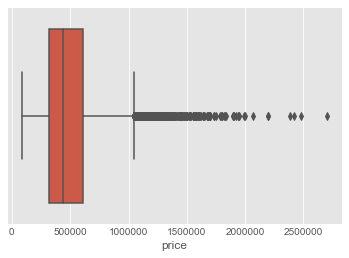

In [16]:
# plot total price boxplot
sb.boxplot('price', data=ds1)

In [17]:
# outlier of price
low_price, high_price = outlier(ds1.price)

In [18]:
# price which is high than outlier
price_outlier_high = ds1[ds1.price > high_price]
price_outlier_high.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
25,1285000.0,4,3.50,3440,3800,3.0,0,0,3,9,3440,0,2014,0,98112
46,1460000.0,4,3.50,4200,14353,2.0,0,2,3,12,3640,560,1996,0,98040
49,1080000.0,4,2.50,4200,35267,2.0,0,0,3,11,4200,0,1990,0,98077
82,1735000.0,4,3.50,4010,9654,2.0,0,0,3,10,4010,0,2007,0,98004
93,1100000.0,4,2.75,3590,5625,2.0,0,0,3,10,3590,0,2012,0,98052


In [19]:
# price which is lower than outlier
price_outlier_low = ds1[ds1.price < low_price]
price_outlier_low

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode


In the total condition of price, there is a lot of high price and no low price. Thus, in next step, we should analyse the data higher than outlier. Because there is too much outlier, it is non-reasonable to say all these data are outlier data. Thus, there must be come other factor which influence to such high price.  
* select the higher price data
* analyze through grade

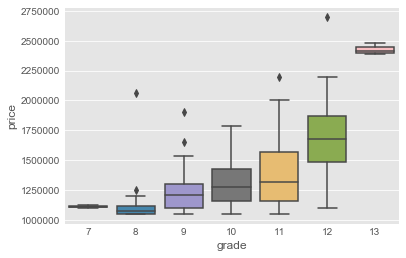

In [20]:
sb.boxplot(x='grade', y='price', data=price_outlier_high)

From the graph above, we find out that, the avarage price grows with the grade increasing. However, there are still some extreme high points. Next step, we will select these points and find out if they are reasonable.

##### grade == 8

In [21]:
price_outlier_high[(price_outlier_high.grade==8) & (price_outlier_high.price > 2000000)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
8869,2.066243e+06,3,2.5,2283,3996,2.0,0,0,3,8,2283,0,2008,0,98031


In [22]:
print('Mean price in zipcode is 98031:', ds1[ds1.zipcode == 98031].price.mean())
print('Mode price in zipcode is 98031:', ds1[ds1.zipcode == 98031].price.mode()[0])
print('Mediam price in zipcode is 98031:', ds1[ds1.zipcode == 98031].price.median())
print('Median bedrooms in zipcode is 98031:', ds1[ds1.zipcode == 98031].bedrooms.median())
print('Median bathrooms in zipcode is 98031:', ds1[ds1.zipcode == 98031].bathrooms.median())
print('Median sqft_living/floors in zipcode is 98031:', (ds1[ds1.zipcode == 98031].sqft_living/ds1[ds1.zipcode == 98031].floors).median())
print('Grade level in zipcode is 98031:\n', ds1[ds1.zipcode == 98031].grade.value_counts())

Mean price in zipcode is 98031: 325330.9403605475
Mode price in zipcode is 98031: 250000.0
Mediam price in zipcode is 98031: 295000.0
Median bedrooms in zipcode is 98031: 3.0
Median bathrooms in zipcode is 98031: 2.375
Median sqft_living/floors in zipcode is 98031: 1377.5
Grade level in zipcode is 98031:
 7     87
8     31
9     12
10     4
6      1
5      1
Name: grade, dtype: int64


The data above gives the candidate outlier value with the grade 8 but extreme high price. But comparing the price in this region, we find out that, the price are all very high. But the price is still lower than the mean, mode, median value in this region but other condition is median. 

Thus, we consider:
> data with index `8869` is outlier value.

##### grade == 9
from the boxplot, we find out that there is only high candidate ooutlier.

In [23]:
# low and high outlier
outlier(price_outlier_high[price_outlier_high.grade == 9].price)

(800243.75, 1602253.75)

In [24]:
price_outlier_high[(price_outlier_high.grade == 9) & (price_outlier_high.price > 1602253.75)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
3777,1.903987e+06,3,2.5,2190,2658,2.0,0,3,4,9,2190,0,1979,0,98033
9463,1.650000e+06,4,4.5,5550,16065,2.0,0,0,3,9,3880,1670,2003,0,98040


There are two items selected for higher outlier. These two items comes from two different regions: `98033` and `98040`.  
Thus, we should analyse these two region one by one.

* Region: `98033` and grade is 9

In [25]:
print('Mean price in zipcode is 98033:', ds1[(ds1.zipcode == 98033) & (ds1.grade == 9)].price.mean())
print('Mode price in zipcode is 98033:', ds1[(ds1.zipcode == 98033) & (ds1.grade == 9)].price.mode()[0])
print('Mediam price in zipcode is 98033:', ds1[(ds1.zipcode == 98033) & (ds1.grade == 9)].price.median())
print('Median bedrooms in zipcode is 98033:', ds1[(ds1.zipcode == 98033) & (ds1.grade == 9)].bedrooms.median())
print('Median bathrooms in zipcode is 98033:', ds1[(ds1.zipcode == 98033) & (ds1.grade == 9)].bathrooms.median())
print('Median sqft_living/floors in zipcode is 98033:', (ds1[(ds1.zipcode == 98033) & (ds1.grade == 9)].sqft_living/ds1[(ds1.zipcode == 98033) & (ds1.grade == 9)].floors).median())

Mean price in zipcode is 98033: 970321.146053058
Mode price in zipcode is 98033: 825000.0
Mediam price in zipcode is 98033: 899000.0
Median bedrooms in zipcode is 98033: 4.0
Median bathrooms in zipcode is 98033: 2.5
Median sqft_living/floors in zipcode is 98033: 1445.0


This part, we choose the items with grade 9 in region of zipcode 98033. The candicate outlier item has a lower condition than the median of similiar items, but it has an extreme high price than other (`1.903987e+06` vs `899000.0`). What's more, this property was build in 1979 which is very old than other. The only reason is that this property has its history values. However, we still should regard it as oultier item.

* Region: `98040` and grade is 9

In [26]:
print('Mean price in zipcode is 98040:', ds1[(ds1.zipcode == 98040) & (ds1.grade == 9)].price.mean())
print('Mode price in zipcode is 98040:', ds1[(ds1.zipcode == 98040) & (ds1.grade == 9)].price.mode()[0])
print('Median price in zipcode is 98040:', ds1[(ds1.zipcode == 98040) & (ds1.grade == 9)].price.median())
print('Median bedrooms in zipcode is 98040:', ds1[(ds1.zipcode == 98040) & (ds1.grade == 9)].bedrooms.median())
print('Median bathrooms in zipcode is 98040:', ds1[(ds1.zipcode == 98040) & (ds1.grade == 9)].bathrooms.median())
print('Median sqft_living/floors in zipcode is 98040:', (ds1[(ds1.zipcode == 98040) & (ds1.grade == 9)].sqft_living/ds1[(ds1.zipcode == 98040) & (ds1.grade == 9)].floors).median())

Mean price in zipcode is 98040: 1033932.8333333334
Mode price in zipcode is 98040: 980000.0
Median price in zipcode is 98040: 987000.0
Median bedrooms in zipcode is 98040: 4.0
Median bathrooms in zipcode is 98040: 2.25
Median sqft_living/floors in zipcode is 98040: 2100.0


From the above data, we find out that the price in region 98040 is also very high. The mean price is `1033932.83` which is lower than the outlier candidate item. However, this property has 4 bedrooms which is in the median of the similiar level but it contains more bathrooms which is 4.5. The value of `sqft_living/floors` is `2775` which is greater than avarage level. What's more, its `sqft_lot` is also very large (16065). Thus it is reasonable for higher price.

Thus, we consider:
> Data with index 3777 is outlier value.

##### grade == 11

In [27]:
# low and high outlier
outlier(price_outlier_high[price_outlier_high.grade == 11].price)

(539125.0, 2188125.0)

In [28]:
price_outlier_high[(price_outlier_high.grade == 11) & (price_outlier_high.price > 2188125.0)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
3784,2200000.0,5,4.0,5840,11652,2.0,0,1,3,11,4410,1430,1988,0,98004


In [29]:
print('Mean price in zipcode is 98040:', ds1[(ds1.zipcode == 98004) & (ds1.grade == 11)].price.mean())
print('Mode price in zipcode is 98040:', ds1[(ds1.zipcode == 98004) & (ds1.grade == 11)].price.mode()[0])
print('Median price in zipcode is 98040:', ds1[(ds1.zipcode == 98004) & (ds1.grade == 11)].price.median())
print('Median bedrooms in zipcode is 98040:', ds1[(ds1.zipcode == 98004) & (ds1.grade == 11)].bedrooms.median())
print('Median bathrooms in zipcode is 98040:', ds1[(ds1.zipcode == 98004) & (ds1.grade == 11)].bathrooms.median())
print('Median sqft_living/floors in zipcode is 98040:', (ds1[(ds1.zipcode == 98004) & (ds1.grade == 11)].sqft_living/ds1[(ds1.zipcode == 98004) & (ds1.grade == 11)].floors).median())

Mean price in zipcode is 98040: 1882500.0
Mode price in zipcode is 98040: 1610000.0
Median price in zipcode is 98040: 1945000.0
Median bedrooms in zipcode is 98040: 5.0
Median bathrooms in zipcode is 98040: 3.5
Median sqft_living/floors in zipcode is 98040: 2345.0


Above data indicate that the price in this region is very high.The avarage price in this region is 1882500.0 which is very high. This proparty contains more bedrooms and bathrooms and in good condition. Thus, this item cannot be outlier.

##### grade == 12

In [30]:
# low and high outlier
outlier(price_outlier_high[price_outlier_high.grade == 12].price)

(905000.0, 2445000.0)

In [31]:
price_outlier_high[(price_outlier_high.grade == 12) & (price_outlier_high.price > 2445000.0)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
4200,2700000.0,4,4.0,7850,89651,2.0,0,0,3,12,7850,0,2006,0,98027


In [32]:
print('Mean price in zipcode is 98027:', ds1[(ds1.zipcode == 98027) & (ds1.grade == 12)].price.mean())
print('Mode price in zipcode is 98027:', ds1[(ds1.zipcode == 98027) & (ds1.grade == 12)].price.mode()[0])
print('Median price in zipcode is 98027:', ds1[(ds1.zipcode == 98027) & (ds1.grade == 12)].price.median())
print('Median bedrooms in zipcode is 98027:', ds1[(ds1.zipcode == 98027) & (ds1.grade == 12)].bedrooms.median())
print('Median bathrooms in zipcode is 98027:', ds1[(ds1.zipcode == 98027) & (ds1.grade == 12)].bathrooms.median())
print('Median sqft_living/floors in zipcode is 98027:', (ds1[(ds1.zipcode == 98027) & (ds1.grade == 12)].sqft_living/ds1[(ds1.zipcode == 98027) & (ds1.grade == 12)].floors).median())

Mean price in zipcode is 98027: 2005000.0
Mode price in zipcode is 98027: 1515000.0
Median price in zipcode is 98027: 1800000.0
Median bedrooms in zipcode is 98027: 4.0
Median bathrooms in zipcode is 98027: 4.0
Median sqft_living/floors in zipcode is 98027: 3185.0


All most all the features in this item follow the mediam rule in this region of similiar level except price. The price of this item is extreme high than avarage which mean outlier.
> Data with index 4200 is outlier value.

##### grade == 13

In [33]:
# low and high outlier
outlier(price_outlier_high[price_outlier_high.grade == 13].price)

(2329500.0, 2517500.0)

In [34]:
price_outlier_high[(price_outlier_high.grade == 13) & (price_outlier_high.price > 2517500.0)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode


### Boxplot bedroom data

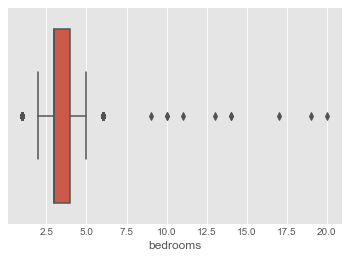

In [35]:
sb.boxplot('bedrooms', data=ds1)

In [36]:
outlier(ds1.bedrooms)

(1.5, 5.5)

#### Analyse lower outlier data

In [37]:
bed_outlier_low = ds1[ds1.bedrooms < 1.5]
bed_outlier_low.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
21,310000.0,1,1.50,1120,912,3.0,0,0,3,7,1120,0,2011,0,98144
158,192500.0,1,1.00,470,63737,1.0,0,2,5,5,470,0,1924,0,98022
216,118000.0,1,1.00,670,7957,1.0,0,0,4,6,670,0,1978,0,98038
356,315000.0,1,2.25,1940,2550,2.0,0,0,4,7,1100,840,1979,0,98133
376,166000.0,1,1.00,1120,17332,1.0,0,0,3,7,1120,0,1988,0,98001


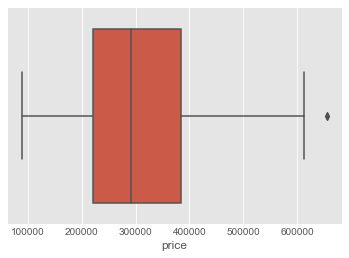

In [38]:
sb.boxplot('price', data=bed_outlier_low)

In [39]:
outlier(bed_outlier_low.price)

(-25219.375, 631365.625)

In [40]:
bed_outlier_low[bed_outlier_low.price > 631365.625]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
9322,655000.0,1,1.0,1660,5422,1.0,0,0,4,7,830,830,1908,0,98117
9624,655100.0,1,1.0,1220,4160,1.0,0,0,3,7,1220,0,1922,0,98115


There are two candidate outlier items: `9322` and `9624`.  
The two items are almost in similiar situation. But with different region. We still need to use region to identify if the item is reasonable.

##### zipcode == 98117

In [41]:
print('Mean price in zipcode is 98117:', ds1[(ds1.zipcode == 98117) & (ds1.grade == 7)].price.mean())
print('Mode price in zipcode is 98117:', ds1[(ds1.zipcode == 98117) & (ds1.grade == 7)].price.mode()[0])
print('Median price in zipcode is 98117:', ds1[(ds1.zipcode == 98117) & (ds1.grade == 7)].price.median())
print('Median bedrooms in zipcode is 98117:', ds1[(ds1.zipcode == 98117) & (ds1.grade == 7)].bedrooms.median())
print('Median bathrooms in zipcode is 98117:', ds1[(ds1.zipcode == 98117) & (ds1.grade == 7)].bathrooms.median())
print('Mean above square in zipcode in 98117:', ds1[(ds1.zipcode == 98117) & (ds1.grade == 7)].sqft_above.mean())


Mean price in zipcode is 98117: 553515.25
Mode price in zipcode is 98117: 505000.0
Median price in zipcode is 98117: 544000.0
Median bedrooms in zipcode is 98117: 3.0
Median bathrooms in zipcode is 98117: 1.75
Mean above square in zipcode in 98117: 1215.3125


Comparing the above data and the candidate item, we find that in this region with grade 7, the avarage price is lower than 655000.0. However, the avarage bedrooms and bathrooms are all grater than the candidate one. Also, the above living square is still larger than it. So, it is un-reasonable and we regard it as outlier.
> Data with index 9322 is outlier value.

##### zipcode == 98115

In [42]:
print('Mean price in zipcode is 98115:', ds1[(ds1.zipcode == 98115) & (ds1.grade == 7)].price.mean())
print('Mode price in zipcode is 98115:', ds1[(ds1.zipcode == 98115) & (ds1.grade == 7)].price.mode()[0])
print('Median price in zipcode is 98115:', ds1[(ds1.zipcode == 98115) & (ds1.grade == 7)].price.median())
print('Median bedrooms in zipcode is 98115:', ds1[(ds1.zipcode == 98115) & (ds1.grade == 7)].bedrooms.median())
print('Median bathrooms in zipcode is 98115:', ds1[(ds1.zipcode == 98115) & (ds1.grade == 7)].bathrooms.median())
print('Mean above square in zipcode in 98115:', ds1[(ds1.zipcode == 98115) & (ds1.grade == 7)].sqft_above.mean())

Mean price in zipcode is 98115: 559019.3352272727
Mode price in zipcode is 98115: 455000.0
Median price in zipcode is 98115: 534500.0
Median bedrooms in zipcode is 98115: 3.0
Median bathrooms in zipcode is 98115: 1.75
Mean above square in zipcode in 98115: 1242.0568181818182


The condition is similiar with the above one. Thus, this item can be regarded as outlier item.
> Data with index 9624 is outlier value.

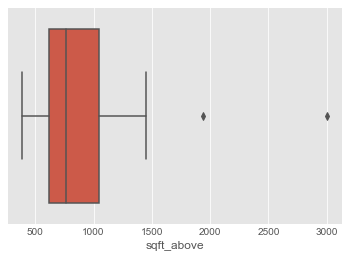

In [43]:
sb.boxplot('sqft_above', data=bed_outlier_low)

In [44]:
outlier(bed_outlier_low.sqft_above)

(-17.5, 1682.5)

In [45]:
bed_outlier_low[bed_outlier_low.sqft_above > 1682.5]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
2737,415000.0,1,2.0,3000,204732,2.5,0,2,3,8,3000,0,1979,0,98014
9628,611206.0,1,1.0,1940,6300,1.0,0,3,3,8,1940,0,1963,0,98116


These two data above looks reasonable. Thus, cannot be outlier.

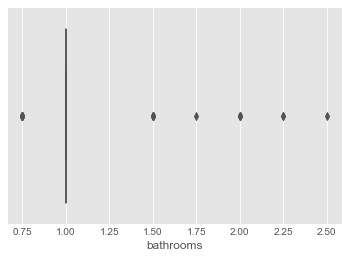

In [46]:
sb.boxplot('bathrooms', data=bed_outlier_low)

In [47]:
bed_outlier_low[bed_outlier_low.bathrooms > 1.25]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
21,310000.0,1,1.50,1120,912,3.0,0,0,3,7,1120,0,2011,0,98144
356,315000.0,1,2.25,1940,2550,2.0,0,0,4,7,1100,840,1979,0,98133
736,550000.0,1,1.50,1900,40600,1.5,0,0,5,9,1450,450,1977,0,98027
1791,611900.0,1,2.25,1220,2100,2.0,0,2,4,8,1220,0,1946,1979,98033
1815,290000.0,1,2.00,1240,4800,2.0,0,0,3,6,1240,0,1910,0,98055
2132,227000.0,1,2.00,1150,9812,1.0,0,0,4,7,1150,0,1962,0,98001
2737,415000.0,1,2.00,3000,204732,2.5,0,2,3,8,3000,0,1979,0,98014
3840,344000.0,1,1.50,760,779,3.0,0,0,3,8,760,0,2006,0,98107
3996,435500.0,1,1.75,1020,4512,1.0,0,0,3,7,770,250,1937,0,98115
7775,250000.0,1,1.50,1180,1688,2.0,0,0,3,8,1070,110,2007,0,98126


In [48]:
bed_outlier_low[(bed_outlier_low.bathrooms > 1.25) & (bed_outlier_low.floors < 2)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
736,550000.0,1,1.50,1900,40600,1.5,0,0,5,9,1450,450,1977,0,98027
2132,227000.0,1,2.00,1150,9812,1.0,0,0,4,7,1150,0,1962,0,98001
3996,435500.0,1,1.75,1020,4512,1.0,0,0,3,7,770,250,1937,0,98115
8552,525000.0,1,1.50,1030,5923,1.0,0,0,3,8,1030,0,1940,0,98105
8619,299000.0,1,2.50,1980,7521,1.0,0,0,4,7,1180,800,1979,0,98055
9612,220000.0,1,1.50,1100,3451,1.5,0,0,4,8,1100,0,1978,0,98198


There, we only consider situation of one floor but with multiple bathrooms. It seems outlier. From the above data, we find out that all six three data has very large `sqft_lot` and some even has very large `sqft_basement`. Thus, all these six items are reasonable.

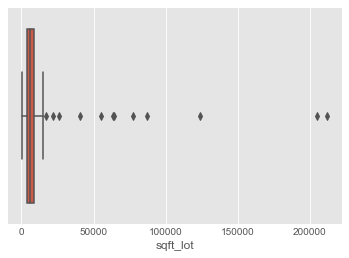

In [49]:
sb.boxplot('sqft_lot', data=bed_outlier_low)

In [50]:
outlier(bed_outlier_low.sqft_lot)

(-3088.625, 15566.375)

In [51]:
bed_outlier_low[bed_outlier_low.sqft_lot > 15566.375]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
158,192500.0,1,1.00,470,63737,1.0,0,2,5,5,470,0,1924,0,98022
376,166000.0,1,1.00,1120,17332,1.0,0,0,3,7,1120,0,1988,0,98001
736,550000.0,1,1.50,1900,40600,1.5,0,0,5,9,1450,450,1977,0,98027
1677,285000.0,1,1.00,1060,54846,1.0,1,4,3,5,1060,0,1935,0,98070
1695,157000.0,1,1.00,870,26326,1.0,0,0,3,6,870,0,1939,0,98198
2737,415000.0,1,2.00,3000,204732,2.5,0,2,3,8,3000,0,1979,0,98014
3509,250000.0,1,1.00,720,123710,1.0,0,0,4,6,720,0,1935,0,98092
4031,291970.0,1,1.00,680,21727,1.0,0,0,3,5,680,0,1952,1995,98058
4073,190000.0,1,0.75,780,77603,1.0,0,0,1,5,780,0,1945,0,98058
4414,440000.0,1,1.00,1160,64469,1.0,0,0,3,7,1160,0,2009,0,98072


The item of index `2737` and `3509` have extreme high `sqft_lot` which will influence the further analysis. Thus, we should regard it as outlier.
> Data with index 2737 is outlier value.  
> Data with index 3509 is outlier value.

#### Analyse Higher outlier data

In [52]:
bed_outlier_high = ds1[ds1.bedrooms > 5.5]
bed_outlier_high.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
19,780000.0,6,4.25,4310,10000,2.0,0,0,3,8,2950,1360,2008,0,98074
69,640000.0,6,2.00,2840,228690,1.5,0,0,3,6,2720,120,1948,0,98019
161,350000.0,13,1.75,2130,7500,1.0,0,0,4,7,1090,1040,1956,0,98166
457,590000.0,10,2.50,3700,12500,1.0,0,0,5,8,1920,1780,1973,0,98006
487,487000.0,6,3.25,4750,248600,2.0,0,0,4,8,4750,0,1947,0,98022


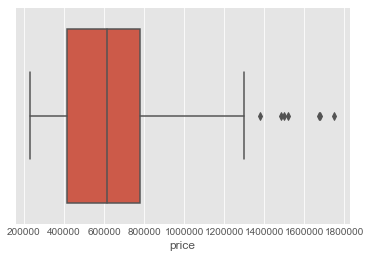

In [53]:
sb.boxplot('price', data=bed_outlier_high)

In [54]:
outlier(bed_outlier_high.price)

(-136875.0, 1330125.0)

In [55]:
bed_outlier_high[bed_outlier_high.price > 1330125.0]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
1174,1675000.0,6,2.25,4910,6600,2.5,0,0,5,10,3580,1330,1910,0,98102
2272,1520000.0,6,3.50,3720,11690,2.0,0,0,3,10,3720,0,2003,0,98040
4277,1680000.0,6,4.75,5770,16747,2.0,0,3,3,12,4500,1270,1998,0,98006
4514,1750000.0,6,4.25,5860,13928,2.0,0,3,3,10,4150,1710,2013,0,98006
5832,1380000.0,6,4.50,5740,10312,2.0,0,2,3,11,3610,2130,2000,0,98006
9221,1500000.0,6,3.50,3670,3959,2.0,0,0,3,10,2410,1260,2008,0,98119
9706,1485000.0,6,2.75,4430,6440,2.0,0,3,3,10,2680,1750,1964,2015,98118


There of these six items comes form same region: `98006` and all of these items are in grade 10 to 12. First, we analyse with region.
##### zipcode
* zipcode == 98006

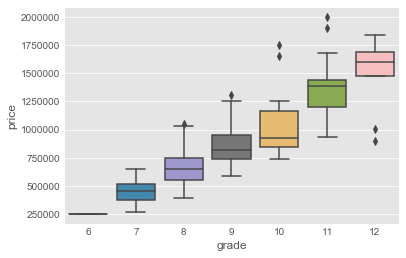

In [56]:
sb.boxplot(x='grade', y='price', data=ds1[(ds1.zipcode==98006)])

From the boxplot above, we find out that most of the price are in this reasonable region except data[4514]. This data is extreme high in price. Thus, we regard it as outlier value.
> Data with index 4514 is outlier value.

* zipcode == 98102

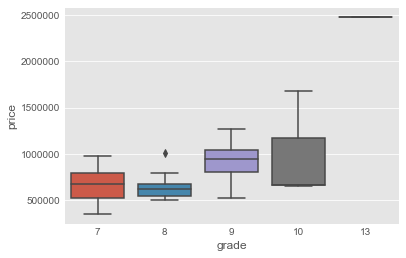

In [57]:
sb.boxplot(x='grade', y='price', data=ds1[(ds1.zipcode==98102)])

From boxplot above, the data with index 1174 is not outlier value.
* zipcode == 98040

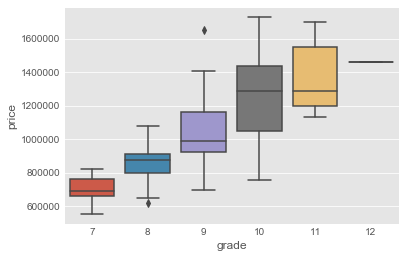

In [58]:
sb.boxplot(x='grade', y='price', data=ds1[(ds1.zipcode==98040)])

Not outlier.
* zipcode == 98119

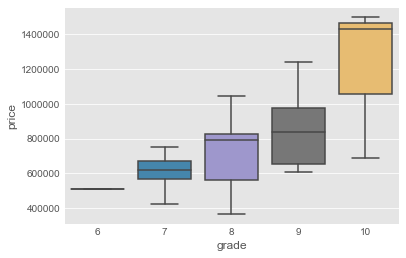

In [59]:
sb.boxplot(x='grade', y='price', data=ds1[(ds1.zipcode==98119)])

No outlier.
* zipcode == 98118

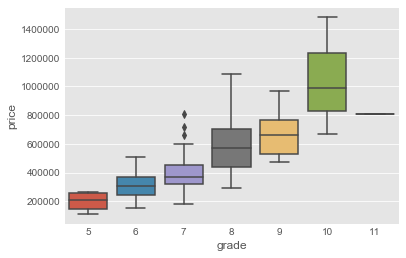

In [60]:
sb.boxplot(x='grade', y='price', data=ds1[(ds1.zipcode==98118)])

No outlier.
##### sqft_living / bedroom

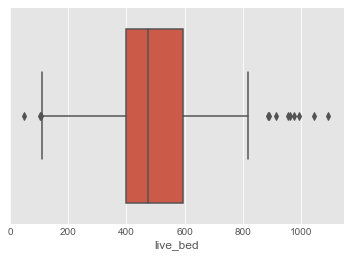

In [61]:
bed_out_high = bed_outlier_high.copy(deep=True)
bed_out_high['live_bed'] = bed_outlier_high.sqft_living / bed_outlier_high.bedrooms
sb.boxplot('live_bed', data=bed_out_high)

In [62]:
outlier(bed_out_high.live_bed)

(109.99999999999994, 883.3333333333335)

In [63]:
bed_out_high[bed_out_high.live_bed < 109.99999999999994]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,live_bed
2019,245000.0,14,1.0,670,1675,1.0,0,0,5,6,670,0,1960,0,98144,47.857143
4846,319500.0,11,1.0,1190,8450,1.0,0,0,5,6,1190,0,1961,0,98059,108.181818
9655,250000.0,17,2.5,1730,7200,2.0,0,0,4,7,1730,0,1985,0,98031,101.764706


All these three data seems outlier. All there three data have more than 10 bedrooms but with only 1 or 2.5 bathrooms. It's un-reasonable. More over, the living square is very small. Thus, we regard them as outliers.
> Data with index 2019 is outlier value.  
> Data with index 4846 is outlier value.  
> Data with index 9655 is outlier value.

In [64]:
bed_out_high[bed_out_high.live_bed > 883.3333333333335]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,live_bed
2033,1300000.0,6,3.50,6563,32670,2.0,0,0,3,10,5153,1410,2002,0,98005,1093.833333
2242,800000.0,6,4.25,5480,189050,2.0,0,0,4,10,5140,340,1991,0,98031,913.333333
3817,1140000.0,6,3.75,5960,20197,2.0,0,4,3,10,3900,2060,2005,0,98065,993.333333
4277,1680000.0,6,4.75,5770,16747,2.0,0,3,3,12,4500,1270,1998,0,98006,961.666667
4514,1750000.0,6,4.25,5860,13928,2.0,0,3,3,10,4150,1710,2013,0,98006,976.666667
5832,1380000.0,6,4.50,5740,10312,2.0,0,2,3,11,3610,2130,2000,0,98006,956.666667
7196,1180000.0,6,6.50,6260,10955,2.0,0,0,3,11,4840,1420,2007,0,98075,1043.333333
7234,1125000.0,6,4.00,5330,18116,2.0,0,0,3,11,3950,1380,2000,0,98006,888.333333
8796,1050000.0,6,4.00,5310,12741,2.0,0,2,3,10,3600,1710,1967,0,98040,885.000000


All these data looks not outlier.

## Outlier drop
From the analyzing of outlier, we find out the outlier points:  

In [65]:
index_list = [8869, 3777, 4299, 9322, 9624, 2737, 3509, 4514, 2019, 4846, 9655, 9566, 3725]
ds.loc[index_list]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
8869,8943600430,20150423T000000,2.066243e+06,3,2.50,2283,3996,2.0,0,0,3,8,2283,0,2008,0,98031,47.4221,-122.192
3777,9808630120,20150108T000000,1.903987e+06,3,2.50,2190,2658,2.0,0,3,4,9,2190,0,1979,0,98033,47.6528,-122.203
4299,1868901275,20150127T000000,4.550000e+05,2,1.00,1430,5000,1.5,0,0,2,7,1430,0,1925,0,98115,47.6727,-122.299
9322,9164100035,20150429T000000,6.550000e+05,1,1.00,1660,5422,1.0,0,0,4,7,830,830,1908,0,98117,47.6821,-122.388
9624,1797500530,20150505T000000,6.551000e+05,1,1.00,1220,4160,1.0,0,0,3,7,1220,0,1922,0,98115,47.6746,-122.315
2737,2025079033,20141210T000000,4.150000e+05,1,2.00,3000,204732,2.5,0,2,3,8,3000,0,1979,0,98014,47.6331,-121.945
3509,1921069059,20141230T000000,2.500000e+05,1,1.00,720,123710,1.0,0,0,4,6,720,0,1935,0,98092,47.2893,-122.084
4514,715010130,20150202T000000,1.750000e+06,6,4.25,5860,13928,2.0,0,3,3,10,4150,1710,2013,0,98006,47.5382,-122.114
2019,3644100073,20141122T000000,2.450000e+05,14,1.00,670,1675,1.0,0,0,5,6,670,0,1960,0,98144,47.5918,-122.295
4846,3211101010,20150211T000000,3.195000e+05,11,1.00,1190,8450,1.0,0,0,5,6,1190,0,1961,0,98059,47.4807,-122.157


In [66]:
ds.drop(index_list, inplace=True)
ds.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,5437400630,20141016T000000,625000.0,4,2.25,1920,8259,2.0,0,0,4,8,1920,0,1979,0,98027,47.5616,-122.088
1,3999300290,20141016T000000,850000.0,3,3.50,2620,11148,2.0,0,4,4,9,2060,560,1977,0,98008,47.5845,-122.115
2,2525059134,20141016T000000,500000.0,2,1.50,1760,12000,1.0,0,0,4,7,1760,0,1964,0,98052,47.6288,-122.109
3,1862400285,20141016T000000,375000.0,3,1.00,1200,5404,1.0,0,0,3,6,1200,0,1937,0,98117,47.6969,-122.368
4,7199320190,20141016T000000,618000.0,4,2.25,2470,7350,1.0,0,0,3,7,1600,870,1978,0,98052,47.6936,-122.128


## Export to CSV

In [67]:
ds.to_csv('dataset4_solution.csv', encoding = 'utf-8')

## Summary

In this task, I use two different ways to search outlier values.
1. Unsupervised learning method (SOS) to find out the probability of outlier.
2. Manually analysis the problem

In manually analysis:  
We can select some columns and analysis them one by one. In this task, we choose to analysis outlier through price and bedroom data. Moreover, grade and zipcode are used when analysis outlier data with price. Because, the location and grade will straightly influence the property price. Thus, under each column analyzing, we will add other influence factors to analysis together to select outlier data.

Boxplot and outlier formula are used to ifentify the outlier firstly.

## Reference

[1] Jeroen J. (2013, November 24), _Stochastic Outlier Selection_. Retrieved from http://jeroenjanssens.com/2013/11/24/stochastic-outlier-selection.html.